## Predicting the Survival of Passengers Aboard the Titanic 

The titanic ship sank on 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship and more than 1,500 died. In this project, i will create a machine learning model to predict if passengers survived or not based on some factors.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score 

In [2]:
# The data
titanic= pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Column Description**
- PassengerId: Unique Passenger Identifier
- Survived: Survival State, 0 denotes didn't survived and 1, Survived
- Pclass: Passenger Class
- Name: Name and title of Passenger
- Sex: Sex of the passenger
- Age: Age of the passenger
- SibSp: Number of Siblings and Spouse passenger had
- Parch: Number of Parents and Children passenger had
- Ticket: Passenger's ticket
- Fare: Cost of Passenger ticket
- Cabin: Area in which Passsenger was seated
- Embarked: Point of Embarkment. S denotes Southampton, C Cherbourg and Q Queenstown

## **Data Cleaning**

In [3]:
# Checking for null values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Dealing with null values in Age Column

In [4]:
# Checking for the mean age of female passengers in the plane
female= titanic.query("Age.notnull() and Sex== 'female'")
mean_age_f = round(female.Age.mean())

In [5]:
# Checking for the mean age of male passengers in the plane
male= titanic.query("Age.notnull() and Sex== 'male'")
mean_age_m = round(male.Age.mean())

In [6]:
# Filling the null values in the age columns for the female passengers with the mean femalle age
titanic['Age']= titanic.apply(lambda row: mean_age_f 
                              if row['Sex']== 'female' and np.isnan(row['Age'])
                              else row['Age'], axis = 1)

In [7]:
# Filling the null values in the age columns for the male passengers with the mean malle age
titanic['Age']= titanic.apply(lambda row: mean_age_m
                              if row['Sex']== 'male' and np.isnan(row['Age'])
                              else row['Age'], axis = 1)

In [8]:
# Change Age to whole number
titanic.Age= titanic.Age.astype(int)

### Dealing with null values in Embarked Column

In [9]:
# Filling the null values in the embarked column with the median
median = titanic.Embarked.value_counts().idxmax()
titanic.Embarked.fillna(median, inplace= True)

In [10]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Null values in the cabin column are not dealth with intentionally as they're deemed unnecessary

## Exploratory Data Analysis(EDA)

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


In [12]:
# Summary Statistics of the numeric columns
cols= ['Age', 'Fare', 'SibSp', 'Parch']
titanic[cols].describe()

,Age,Fare,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,29.763187,32.204208,0.523008,0.381594
std,13.026465,49.693429,1.102743,0.806057
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000
50%,30.000000,14.454200,0.000000,0.000000
75%,35.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


In [13]:
# Percentage of passengers survival
titanic.Survived.value_counts()/titanic.Survived.count()*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Approximately, 61% of the passengers died on the titanic while 38% survived

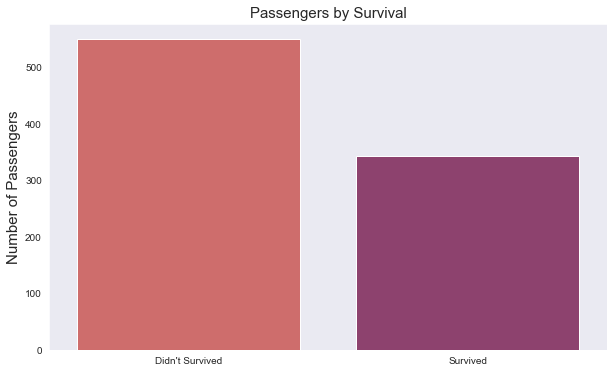

In [14]:
# Visualizing the Number of passengers aboard the titanic by their survival
sns.set_style('dark')
plt.figure(figsize= (10, 6))
sns.countplot(x= 'Survived', data= titanic, palette= 'flare').set(xlabel= None)
plt.title('Passengers by Survival', size= 15)
plt.ylabel('Number of Passengers', size= 15)
plt.xticks([0, 1],["Didn't Survived", "Survived"])
plt.show()

In [15]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

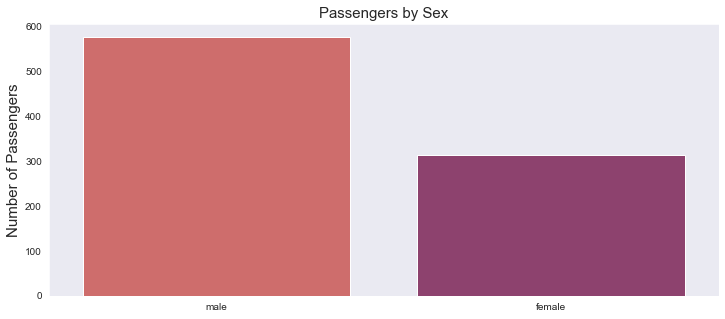

In [16]:
# Number of passengers by Sex
plt.figure(figsize= (12, 5))
sns.countplot(x= 'Sex', data= titanic, palette= 'flare').set(xlabel= None)
plt.title('Passengers by Sex', size= 15)
plt.ylabel('Number of Passengers', size= 15)
plt.show()

The number of men on the ship were nearly double the number of women and girls on the ship

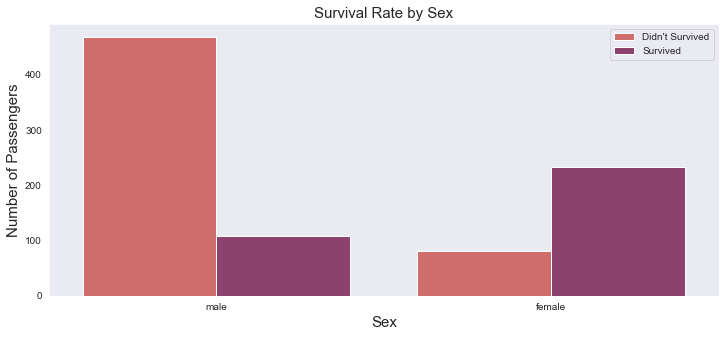

In [17]:
# Visualizing the survival rate by sex of the passengers
plt.figure(figsize= (12, 5))
sns.countplot(x= 'Sex', data= titanic, hue= 'Survived', palette= 'flare')
plt.title('Survival Rate by Sex', size= 15)
plt.xlabel('Sex', size= 15)
plt.ylabel('Number of Passengers', size= 15)
plt.legend(loc= 'upper right', labels = ["Didn't Survived", 'Survived'])
plt.show()

More Men died compared to women. This could be traced to the age-old tradition of giving women and children more priority in troubling times and fact that the numbers of men aboard were almost double of the women aboard the ship.

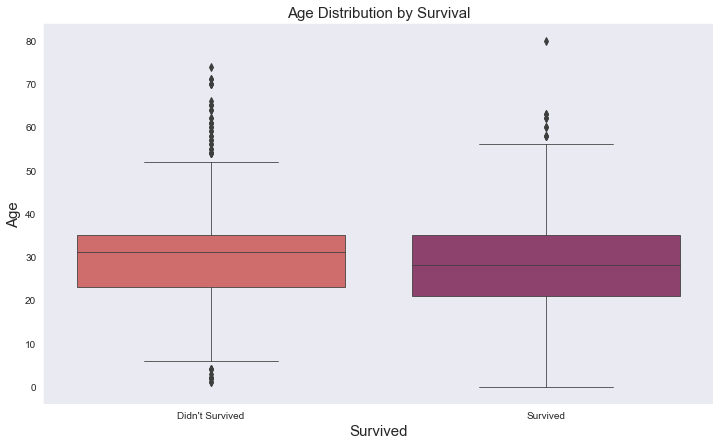

In [18]:
# Visualizing the age distribution by survival rate
plt.figure(figsize= (12, 7))
sns.boxplot(x= 'Survived', y= 'Age', data= titanic, palette= 'flare', linewidth= 0.8)
plt.title('Age Distribution by Survival', size= 15)
plt.xlabel('Survived', size= 15)
plt.xticks([0, 1],["Didn't Survived", "Survived"])
plt.ylabel('Age', size= 15)
plt.show()

More younger people survived compared to those that did not. Although a couple of older people also survived in spite of their age.

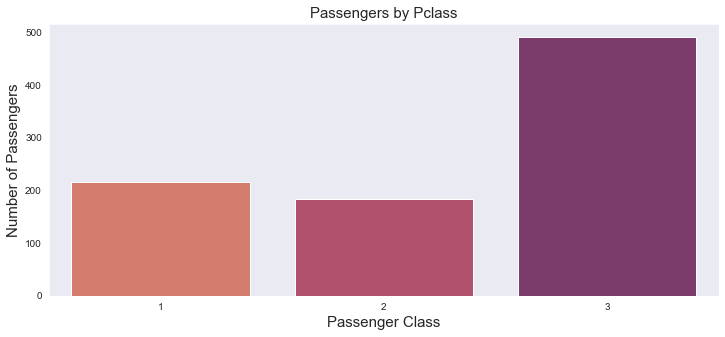

In [19]:
# Visualizing the survival rate by passenger class
plt.figure(figsize= (12, 5))
sns.countplot(x= 'Pclass', data= titanic, palette= 'flare')
plt.title('Passengers by Pclass', size= 15)
plt.xlabel('Passenger Class', size= 15)
plt.ylabel('Number of Passengers', size= 15)
plt.show()

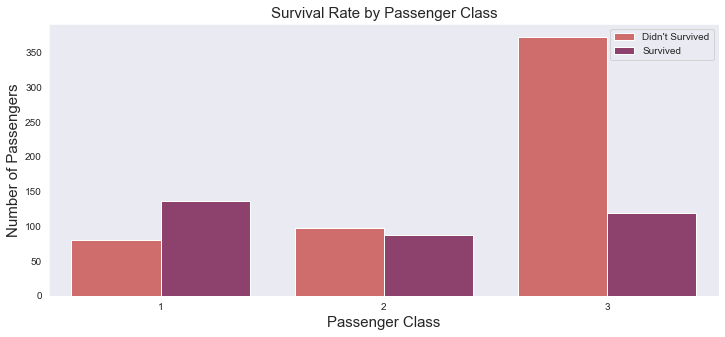

In [20]:
# Visualizing the survival rate by passenger class
plt.figure(figsize= (12, 5))
sns.countplot(x= 'Pclass', data= titanic, palette= 'flare', hue= 'Survived')
plt.title('Survival Rate by Passenger Class', size= 15)
plt.xlabel('Passenger Class', size= 15)
plt.ylabel('Number of Passengers', size= 15)
plt.legend(loc= 'upper right', labels = ["Didn't Survived", 'Survived'])
plt.show()

The passenger class numbered 1 to 3 refers to the luxury/comfort of cabins. The lower the pclass number, the more luxurious it was and closer to the top of the ship. The lowest class, 3 was on the lower end of the ship and thus closer to the water, hence more people died from this pclass and unfortunately, majority of the passengers were on this class.

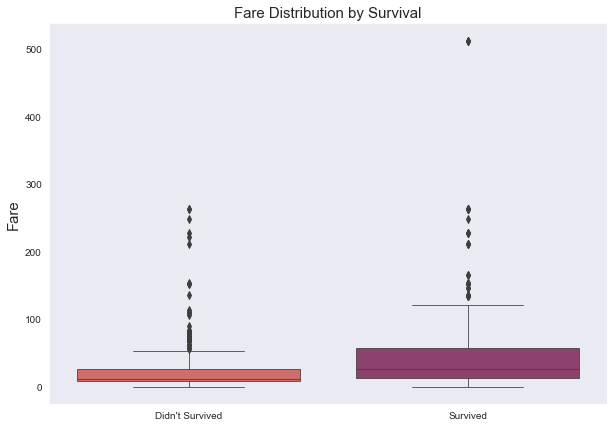

In [21]:
# Visualizing the fare distribution by survival
plt.figure(figsize= (10, 7))
sns.boxplot(y= 'Fare', x= 'Survived', data= titanic, palette= 'flare',  linewidth= 0.8).set(xlabel= None)
plt.title('Fare Distribution by Survival', size= 15)
plt.xticks([0, 1],["Didn't Survived", "Survived"])
plt.ylabel('Fare', size= 15)
plt.show()

Passengers with higher fares survived more than those with lower fares. This correlates with the pclass as the more luxurious cabins cost higher than the less luxurious.

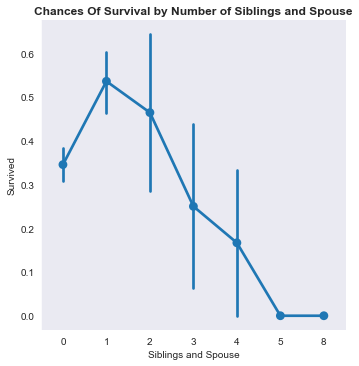

In [22]:
# Visualizing the Probability of Survival by Number of Siblings and Spouse
plt.rcParams["figure.figsize"]= (15, 7)
sns.factorplot(x= 'SibSp', y= 'Survived', data= titanic)
plt.title('Chances Of Survival by Number of Siblings and Spouse', fontweight= 'bold')
plt.xlabel('Siblings and Spouse')
plt.show()

The chances of survival decreases as the number of Siblings and spouse aboard the ship increases.

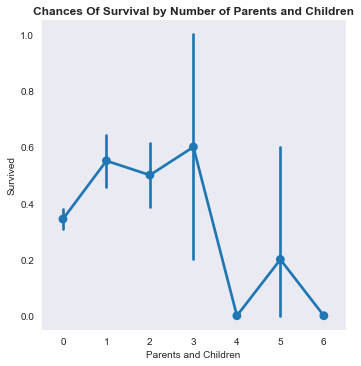

In [23]:
# Visualizing the Probability of Survival by Number of Parents and Children
plt.rcParams["figure.figsize"]= (15, 7)
sns.factorplot(x= 'Parch', y= 'Survived', data= titanic)
plt.title('Chances Of Survival by Number of Parents and Children', fontweight= 'bold')
plt.xlabel('Parents and Children')
plt.show()

Here we can see that a passenger had higher chances of surviving if they had less parents/children aboard the ship, with those with 3 Parents/children having the highest chance.

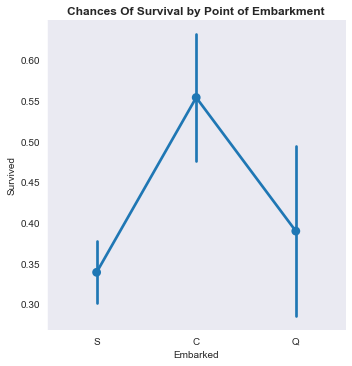

In [24]:
# Visualizing the Probability of Survival by Point of Emnbarkment
plt.rcParams["figure.figsize"]= (15, 7)
sns.factorplot(x= 'Embarked', y= 'Survived', data= titanic)
plt.title('Chances Of Survival by Point of Embarkment', fontweight= 'bold')
plt.show()

The highest survival chance lies in the cherbourgh point of embarkment

## **Building Machine Learning Models**

### **Data Preprocessing**

**From the EDA, the following conclusions were reached:**
- **Features** = Pclass, Sex, Age, Fare, SibSp, Parch, Embarked

- **Label** = survived

In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [26]:
# Transforming the sex and Embarked columns from categorical to numeric values
label = LabelEncoder()
titanic.Sex = label.fit_transform(titanic.Sex)
titanic.Embarked = label.fit_transform(titanic.Embarked)

In [27]:
# Converting the fare column to integer
titanic.Fare = titanic.Fare.astype(int)

In [28]:
# Subsetting for the features and labels
cols=['Sex', 'Age', 'Pclass', 'Fare', 'Parch', 'SibSp', 'Embarked']
x= titanic[cols]
y= titanic['Survived']

Features that are not subsetted are not necessary in the modelling. These are Name, Ticket, Cabin and PassengerId. They contribute noise o the data.

In [29]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state= 0)

print('Training Cases:', len(X_train))
print('Test Cases:', len(X_test))

Training Cases: 596
Test Cases: 295


In [30]:
X_train

,Sex,Age,Pclass,Fare,Parch,SibSp,Embarked
242,1,29,2,10,0,0,2
344,1,36,2,13,0,0,2
170,1,61,1,33,0,0,2
187,1,45,1,26,0,0,2
800,1,34,2,13,0,0,2
...,...,...,...,...,...,...,...
835,0,39,1,83,1,1,0
192,0,19,3,7,0,1,2
629,1,31,3,7,0,0,1
559,0,36,3,17,0,1,2


### **Classification with Logistic Regression**

In [31]:
log_model = LogisticRegression()

In [32]:
# Scaling the features to the same range
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = log_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [35]:
lr_score = log_model.score(X_train, y_train)
lr_score


0.8087248322147651

In [36]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[154,  30],
       [ 32,  79]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       184
           1       0.72      0.71      0.72       111

    accuracy                           0.79       295
   macro avg       0.78      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295



In [38]:
# Evaluation of the Logistic Regression Model
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr= recall_score(y_test, y_pred)

#### **Making a different split of the data that doesn't require scaling as it is unnecessary for the next two models, Decision Tree and Random Forest**

In [39]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y, test_size = 0.3, random_state= 0)

print('Training Cases:', len(X_train1))
print('Test Cases:', len(X_test1))

Training Cases: 623
Test Cases: 268


### **Classification with Decision Tree**

In [40]:
dt_model = DecisionTreeClassifier()

In [41]:
dt_model.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [42]:
y_pred1 = dt_model.predict(X_test1)
y_pred1

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [43]:
dt_score = dt_model.score(X_train1, y_train1)
dt_score

0.9646869983948636

In [44]:
cm1= confusion_matrix(y_test1, y_pred1)
cm1

array([[141,  27],
       [ 31,  69]], dtype=int64)

In [45]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       168
           1       0.72      0.69      0.70       100

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [46]:
# Evaluation of the Decision Tree Model
accuracy_dt = accuracy_score(y_test1, y_pred1)
precision_dt = precision_score(y_test1, y_pred1)
recall_dt= recall_score(y_test1, y_pred1)

### **Classification with Random Forest**

In [47]:
rf_model = RandomForestClassifier()

In [48]:
rf_model.fit(X_train1, y_train1)

RandomForestClassifier()

In [49]:
y_pred2 = rf_model.predict(X_test1)
y_pred2

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [50]:
rf_score = rf_model.score(X_train1, y_train1)
rf_score

0.9646869983948636

In [51]:
cm2= confusion_matrix(y_test1, y_pred2)
cm2

array([[144,  24],
       [ 30,  70]], dtype=int64)

In [52]:
print(classification_report(y_test1, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       168
           1       0.74      0.70      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [53]:
# Evaluation of the Random Forest Model
accuracy_rf = accuracy_score(y_test1, y_pred2)
precision_rf = precision_score(y_test1, y_pred2)
recall_rf= recall_score(y_test1, y_pred2)

## **Conclusion**

In [54]:
# Creating a dataframe to contain each model and its metrics
results = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'], 
                        'Score': np.round([lr_score, dt_score, rf_score], 2),
                        'Accuracy': np.round([accuracy_lr, accuracy_dt, accuracy_rf], 2),
                        'Precision':np.round([precision_lr, precision_dt, precision_rf], 2),
                        'Recall': np.round([recall_lr, recall_dt, recall_rf], 2)})

results = results.sort_values(['Accuracy', 'Precision'], ascending= False).reset_index(drop=True)
results

,Model,Score,Accuracy,Precision,Recall
0,Random Forest,0.96,0.80,0.74,0.70
1,Logistic Regression,0.81,0.79,0.72,0.71
2,Decision Tree,0.96,0.78,0.72,0.69


In [55]:
# Tabulating the importance of each feature to the prediction
feature_importance= pd.DataFrame({'feature': X_train1.columns, 
                                  'importance': np.round((rf_model.feature_importances_)*100, 2)})
feature_importance = feature_importance.sort_values('importance', ascending= False).reset_index(drop= True)
feature_importance

,feature,importance
0,Age,30.29
1,Sex,26.10
2,Fare,20.57
3,Pclass,8.56
4,SibSp,5.68
5,Embarked,4.54
6,Parch,4.26


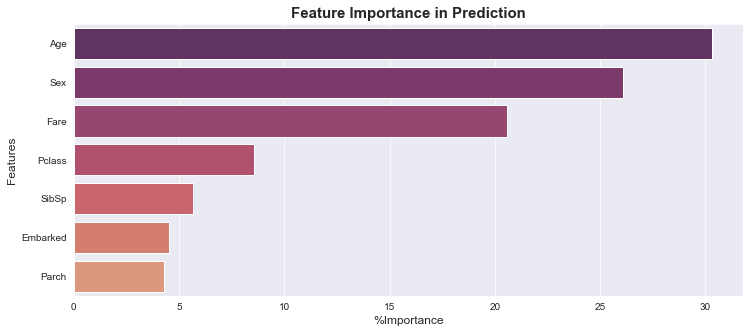

In [56]:
# Visualizing the Feature Importance
sns.set_style('darkgrid')
plt.figure(figsize= (12, 5))
sns.barplot(x= 'importance', y= 'feature', data= feature_importance, palette= 'flare_r')
plt.title('Feature Importance in Prediction',fontweight= 'bold', size= 15)
plt.xlabel('%Importance', size= 12)
plt.ylabel('Features', size= 12)
plt.show()

**A breakdown of the results**
- The Accuracy refers to how many predictions were correct (overall)
- Precision: of all cases predicted to be positive, how many were actually positive?
- Recall: how many positive cases did the model correctly identify?

**Note:**
- The best performing model is the Random Forest model. It has an accuracy score of 0.80 and a precision score of 0.74, followed by the decison tree model and lastly the logistic regression model.

- Using the feature_importance_ function, the random forest model provided the varying importance of the features fitted in the model. Age, sex and Fare are some of the most importance predictive features when it comes to if a passenger will urvive the titanic or not. The least important feature is the number of parents and children.